In [1]:
from multiview.datasets.base import load_UCImultifeature
from multiview.embed import pls
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load Data

In [67]:
# Load full dataset, labels not needed
Xs, y = load_UCImultifeature()

## Embed
Embedding of the first view based on a regression fit to the second view features.

In [68]:
# Embed the first view
X = Xs[0]
# Regression target is the second view
Y = Xs[1]
# Calculate best embedding
Xhat = pls.partial_least_squares_embedding(X, Y, n_components=2)

In [69]:
# Extract first two components to view
component_1 = Xhat[:,0]
component_2 = Xhat[:,1]

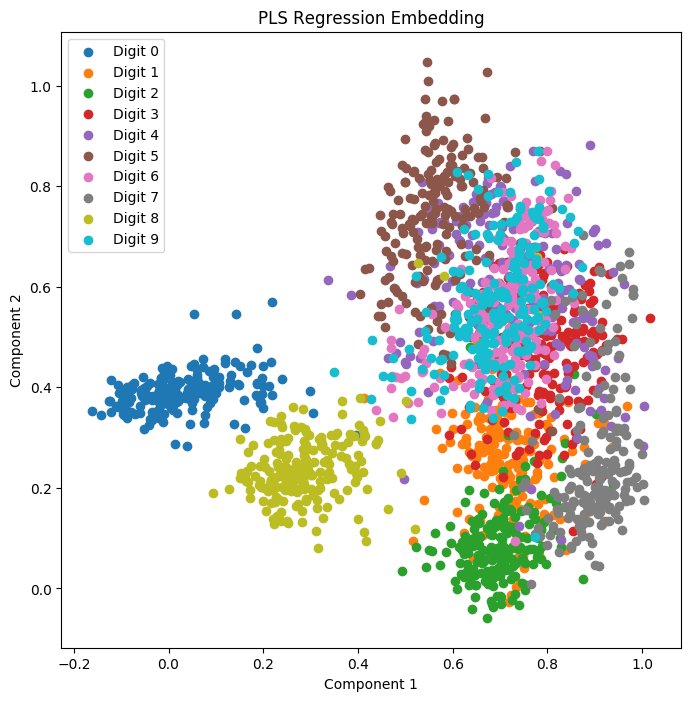

In [73]:
fig, ax = plt.subplots(figsize=(8,8))
for g in np.unique(y):
    i = np.where(y == g)
    ax.scatter(component_1[i], component_2[i], label=f'Digit {int(g)}')
ax.legend()
plt.title('PLS Regression Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()